In [42]:
# Import the NumPy module.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [44]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [45]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [46]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [47]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [48]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd6a8a81f251066c6dc4a149fd6e734b


In [49]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd6a8a81f251066c6dc4a149fd6e734b&q=Boston


In [50]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [51]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [52]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [53]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":28.2,"feels_like":20.8,"temp_min":25,"temp_max":30.99,"pressure":1024,"humidity":79},"visibility":10000,"wind":{"speed":4.7,"deg":200},"clouds":{"all":75},"dt":1608473231,"sys":{"type":1,"id":3486,"country":"US","sunrise":1608466195,"sunset":1608498856},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [54]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 28.2,
  'feels_like': 20.8,
  'temp_min': 25,
  'temp_max': 30.99,
  'pressure': 1024,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1608473231,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1608466195,
  'sunset': 1608498856},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [55]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [56]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [57]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fd6a8a81f251066c6dc4a149fd6e734b&q=Bston


In [58]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 28.2,
  'feels_like': 20.8,
  'temp_min': 25,
  'temp_max': 30.99,
  'pressure': 1024,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1608473231,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1608466195,
  'sunset': 1608498856},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [59]:
# Get the JSON data.
boston_data = city_weather.json()

In [60]:
boston_data['sys']["country"]

'US'

In [61]:
boston_data["dt"]

1608473231

In [62]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 30.99 79 75 4.7


In [63]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-12-20 14:07:11'

In [64]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'12/20/20'

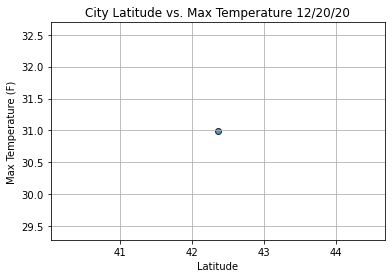

In [67]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lat,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()